<a href="https://colab.research.google.com/github/AnishaBasil/HHA504_Practice/blob/master/AnovasFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, bartlett
import statsmodels.stats.multicomp as mc
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing dataframe to be analyzed 

In [ ]:
df1 = pd.read_csv('insurance.csv')
df1 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Generating a list of columns within the dataframe to identify variables for ANOVA tests 

In [ ]:
list(df1)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']





Age: age of primary beneficiary


Gender: 2 parameters (female, male)


Bmi:  Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 


Children: Number of children covered by health insurance or Number of dependents


Smoking status: yes or no 


Charges: Individual medical costs billed by health insurance

Region: southwest, southeast, northwest, northeast 
______





In [ ]:
df1['sex'] = df1['sex'].replace(np.NaN, 'Other')

In [ ]:
df1.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df1.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df1.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

DV- Insurance Charges


IV- Gender, Smoking status, Region 


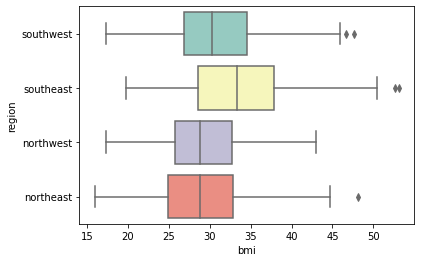

In [ ]:
boxplot = sns.boxplot(x='bmi', y= 'region', data=df1, palette="Set3")

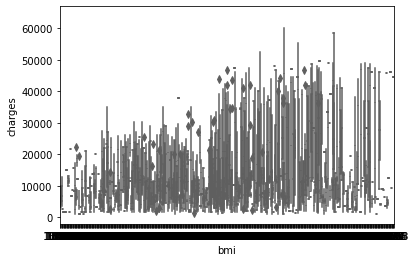

In [ ]:
boxplot = sns.boxplot(x='bmi', y= 'charges', data=df1, palette="Set3")

In [ ]:
smoker_status1 = df1[df1['smoker'] == 'yes']
smoker_status2 = df1[df1['smoker'] == 'no']

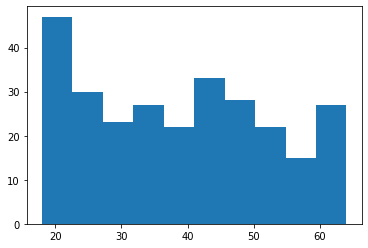

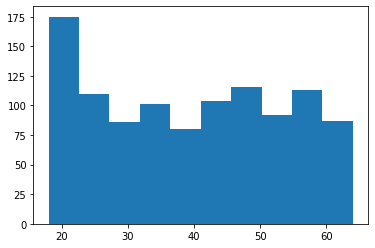

In [ ]:
plt.hist(smoker_status1['age'])
plt.show()
plt.hist(smoker_status2['age'])
plt.show()

    

---



# **Anovas**


In [ ]:
stats.f_oneway(df1['charges'][df1['region'] == 'northwest'],
               df1['charges'][df1['region'] == 'northeast'],
               df1['charges'][df1['region'] == 'southeast'],                                    
               df1['charges'][df1['region'] == 'southwest'])

F_onewayResult(statistic=2.969626693589119, pvalue=0.0308933560705201)

Question 1: Is there a difference in insurance charges among different regions? 

The result above (p<0.05) indicates that there is a significant difference in charges among different regions.


In [ ]:
stats.f_oneway(df1['bmi'][df1['sex'] == 'male'],                                   
               df1['bmi'][df1['sex'] == 'female'])

F_onewayResult(statistic=2.878969506932102, pvalue=0.08997637178992055)

In [ ]:
model1 = smf.ols("sex ~ C(bmi)", data = df1).fit()
stats.shapiro(model1.resid)

(0.9591031074523926, 8.120863877551575e-27)

Question 2: Is there a difference between an individuals bmi and their sex?

The p value is less than 0.05 so theres is a significant difference between sex and bmi

In [ ]:
model1 = smf.ols("sex ~ C(smoker)", data = df1).fit()
stats.shapiro(model1.resid)

(0.6982505917549133, 0.0)

Question 3: Is there a difference between sex and being a smoker?

There is a significant difference, rejecting the null hypothesis

# POST_HOC_RES

In [ ]:
import statsmodels.stats.multicomp as mc
comp1 = mc.MultiComparison(df1['bmi'], df1['region'])
post_hoc_res = comp1.tukeyhsd() 
tukeyway1 = post_hoc_res.summary()

In [ ]:
import statsmodels.stats.multicomp as mc
comp2 = mc.MultiComparison(df1['bmi'], df1['age'])
post_hoc_res = comp2.tukeyhsd() 
tukeyway2 = post_hoc_res.summary()

In [ ]:
import statsmodels.stats.multicomp as mc
comp3 = mc.MultiComparison(df1['bmi'], df1['children'])
post_hoc_res = comp3.tukeyhsd() 
tukeyway3 = post_hoc_res.summary()

In [ ]:
import statsmodels.stats.multicomp as mc
comp4 = mc.MultiComparison(df1['bmi'], df1['smoker'])
post_hoc_res = comp4.tukeyhsd() 
tukeyway4 = post_hoc_res.summary()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
